## Collatz binary notebook

In [5]:
"""
This experimental notebook analyses randomly generated collatz sequences 
from a binary perspective.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Derive new fields
analysis_frame["v_1"] = START_VALUE
analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["bin_str"].apply(len)
analysis_frame["log2_xi"] = analysis_frame["collatz"].apply(log2)

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_diff"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

# Print data
print_frame = analysis_frame[[
    "v_1", "collatz", "odd", "bin_len", "bin_str", "log2_xi", "bin_diff"]]

print_frame.columns = [
    "v_1", "x_i", "odd", "bin_len", "bin_str", "log2_xi", "bin_diff"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 37  K: 3 

 v_1  x_i  odd  bin_len  bin_str   log2_xi  bin_diff
  37   37    1        6   100101  5.209453         0
  37  112    0        7  1110000  6.807355         1
  37   56    0        6   111000  5.807355        -1
  37   28    0        5    11100  4.807355        -1
  37   14    0        4     1110  3.807355        -1
  37    7    1        3      111  2.807355        -1
  37   22    0        5    10110  4.459432         2
  37   11    1        4     1011  3.459432        -1
  37   34    0        6   100010  5.087463         2
  37   17    1        5    10001  4.087463        -1
  37   52    0        6   110100  5.700440         1
  37   26    0        5    11010  4.700440        -1
  37   13    1        4     1101  3.700440        -1
  37   40    0        6   101000  5.321928         2
  37   20    0        5    10100  4.321928        -1
  37   10    0        4     1010  3.321928        -1
  37    5    1        3      101  2.321928        -1
  37   16    0        

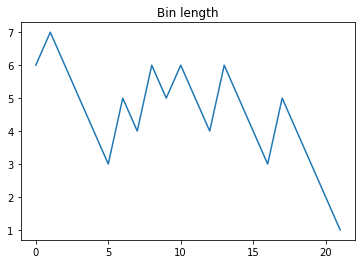

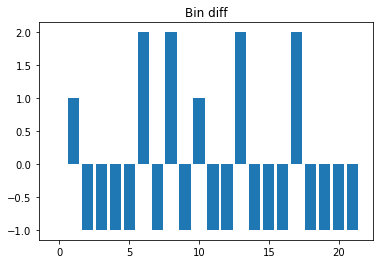

In [6]:
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Bin diff")
plt.bar(analysis_frame.index, analysis_frame["bin_diff"])

plt.show()